In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [3]:
data = pd.read_csv('UCI_Credit_Card.csv')
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [5]:
# Numerical Features
data[['AGE','LIMIT_BAL', 'PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,AGE,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,35.485500,167484.322667,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,9.217904,129747.661567,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,21.000000,10000.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,28.000000,50000.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,34.000000,140000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,41.000000,240000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,79.000000,1000000.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [6]:
# Categorical Features
data[['SEX', 'EDUCATION', 'MARRIAGE']].describe()

,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867
std,0.489129,0.790349,0.521970
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


In [7]:
data = data.rename(columns={'default.payment.next.month': 'default', 
                        'PAY_0': 'PAY_1'})

In [8]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [9]:
# Categorical Features
# 1) Marriage
marrige_df = data.MARRIAGE.value_counts().reset_index()
marrige_df.head()

,index,MARRIAGE
0,2,15964
1,1,13659
2,3,323
3,0,54


No handles with labels found to put in legend.


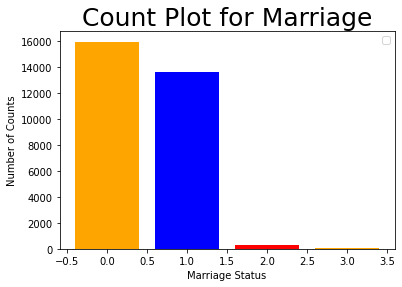

In [10]:
plt.bar(marrige_df.index,marrige_df.MARRIAGE,color=['orange','blue','red'])
plt.title("Count Plot for Marriage",{'fontsize':25});
plt.xlabel("Marriage Status")
plt.ylabel("Number of Counts")
plt.legend();

In [11]:
edu_df = data.EDUCATION.value_counts().reset_index()
edu_df.head()

,index,EDUCATION
0,2,14030
1,1,10585
2,3,4917
3,5,280
4,4,123


In [12]:
def func(df):
    if df == 0:
        return 'University'
    elif df == 1:
        return 'Graduate School'
    elif df == 2:
        return 'High school'
    elif df == 3:
        return 'Unknown 1'
    elif df == 4:
        return 'Others'
    elif df == 5:
        return 'Unknown 2'
    elif df == 6:
        return 'Unknown 3'

In [13]:
edu_df['index'] = edu_df['index'].apply(func)


In [14]:
edu_df.rename(columns={'index':'EDU_NO'},inplace=True)
edu_df.head()

,EDU_NO,EDUCATION
0,High school,14030
1,Graduate School,10585
2,Unknown 1,4917
3,Unknown 2,280
4,Others,123


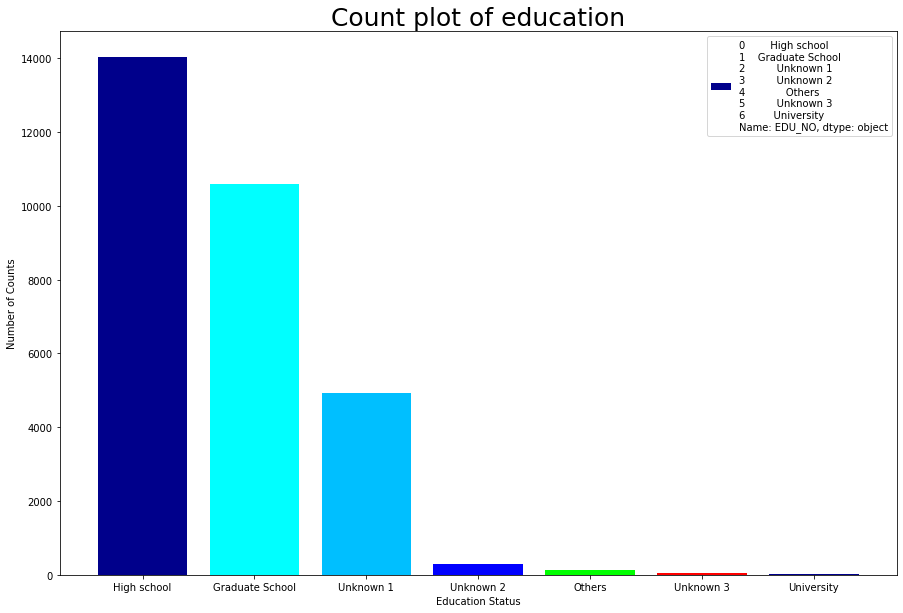

In [15]:

plt.figure(figsize=(15,10))
plt.bar(edu_df.EDU_NO,edu_df.EDUCATION,color=['darkblue','aqua','deepskyblue','blue','lime','red'],label=edu_df.EDU_NO)
plt.title('Count plot of education',{'fontsize':25})
plt.xlabel('Education Status')
plt.ylabel('Number of Counts')
plt.legend();

In [16]:
# Sex
sex_df = data['SEX'].value_counts().reset_index()

In [17]:
sex_df.rename(columns={'index':'GENDER'},inplace=True)

In [18]:
sex_df.head()

,GENDER,SEX
0,2,18112
1,1,11888


In [19]:
def func2(df):
    if df == 1:
        return 'Male'
    return 'Female'

In [20]:
sex_df.GENDER = sex_df.GENDER.apply(func2)

In [21]:
sex_df.head()

,GENDER,SEX
0,Female,18112
1,Male,11888


Text(0, 0.5, 'Number of Counts')

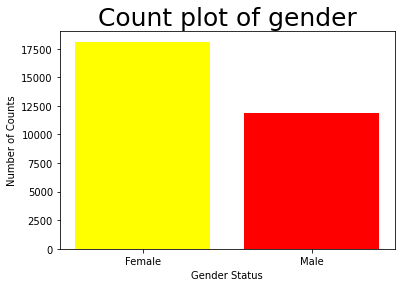

In [22]:
plt.bar(sex_df.GENDER,sex_df.SEX,color=['yellow','red'])
plt.title('Count plot of gender',{'fontsize':25})
plt.xlabel("Gender Status")
plt.ylabel('Number of Counts')

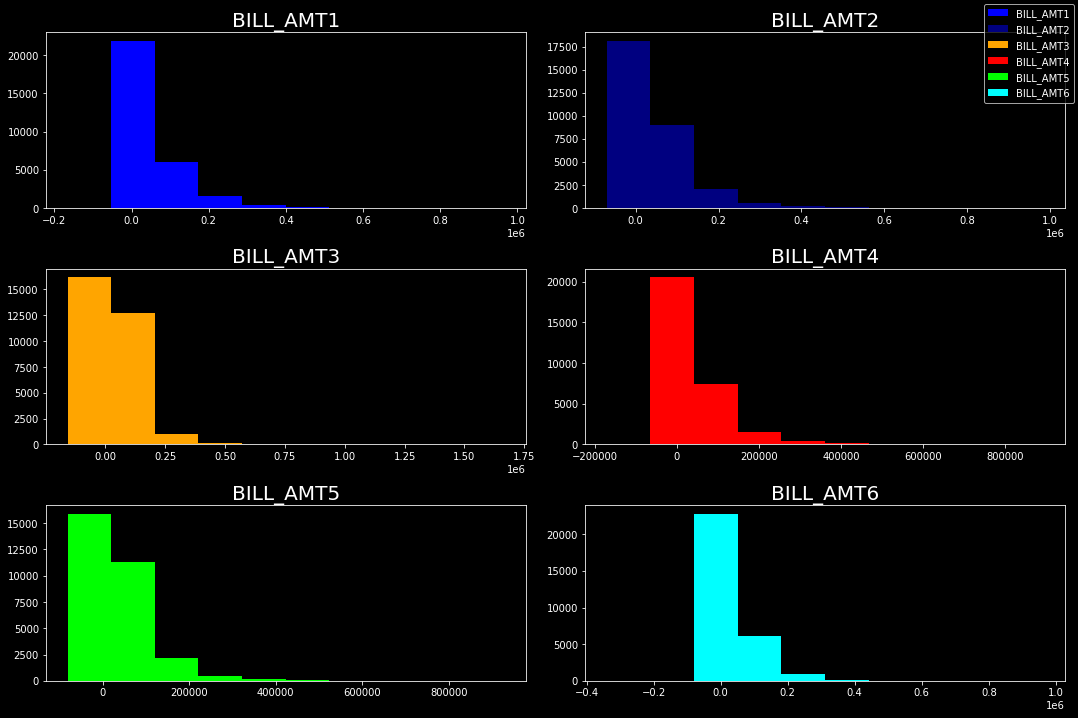

In [23]:
import matplotlib as mpl
mpl.style.use('dark_background')
#fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6)) = plt.subplots(3, 2)
fig, ax = plt.subplots(3, 2,figsize=(15,10));
ax[0,0].hist(data.BILL_AMT1,label='BILL_AMT1',color='blue');
ax[0,0].set_title('BILL_AMT1',{'fontsize':20})
ax[0,1].hist(data.BILL_AMT2,label='BILL_AMT2',color='navy');
ax[0,1].set_title('BILL_AMT2',{'fontsize':20})
ax[1,0].hist(data.BILL_AMT3,label='BILL_AMT3',color='orange');
ax[1,0].set_title('BILL_AMT3',{'fontsize':20})
ax[1,1].hist(data.BILL_AMT4,label='BILL_AMT4',color='red');
ax[1,1].set_title('BILL_AMT4',{'fontsize':20})
ax[2,0].hist(data.BILL_AMT5,label='BILL_AMT5',color='lime');
ax[2,0].set_title('BILL_AMT5',{'fontsize':20})
ax[2,1].hist(data.BILL_AMT6,label='BILL_AMT6',color='cyan');
ax[2,1].set_title('BILL_AMT6',{'fontsize':20})
fig.tight_layout()
fig.legend()

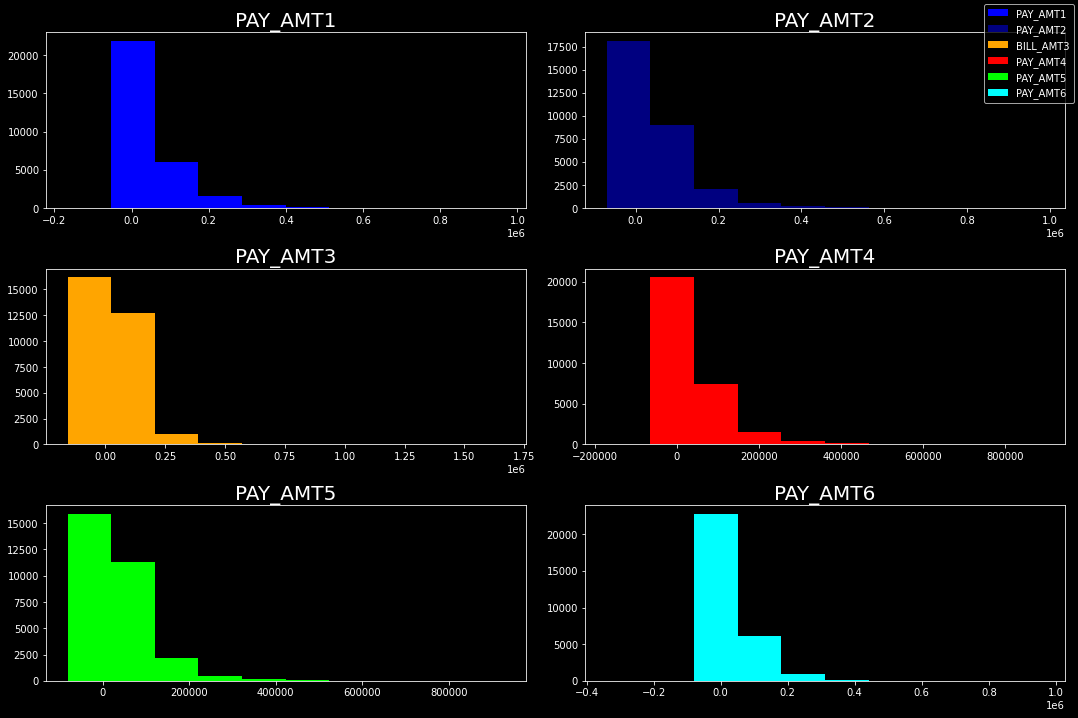

In [24]:
fig, ax = plt.subplots(3, 2,figsize=(15,10));
ax[0,0].hist(data.BILL_AMT1,label='PAY_AMT1',color='blue');
ax[0,0].set_title('PAY_AMT1',{'fontsize':20})
ax[0,1].hist(data.BILL_AMT2,label='PAY_AMT2',color='navy');
ax[0,1].set_title('PAY_AMT2',{'fontsize':20})
ax[1,0].hist(data.BILL_AMT3,label='BILL_AMT3',color='orange');
ax[1,0].set_title('PAY_AMT3',{'fontsize':20})
ax[1,1].hist(data.BILL_AMT4,label='PAY_AMT4',color='red');
ax[1,1].set_title('PAY_AMT4',{'fontsize':20})
ax[2,0].hist(data.BILL_AMT5,label='PAY_AMT5',color='lime');
ax[2,0].set_title('PAY_AMT5',{'fontsize':20})
ax[2,1].hist(data.BILL_AMT6,label='PAY_AMT6',color='cyan');
ax[2,1].set_title('PAY_AMT6',{'fontsize':20})
fig.tight_layout()
fig.legend()

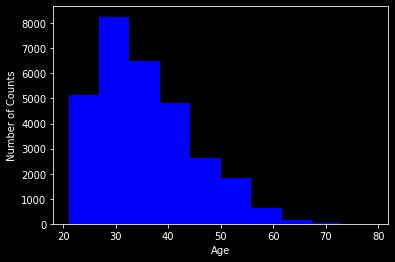

In [25]:
# Age
plt.hist(data.AGE,color='blue');
plt.xlabel('Age');
plt.ylabel('Number of Counts');

In [26]:
# Target Variable
target_count = data.default.value_counts()
target_count = target_count.reset_index()
target_count

,index,default
0,0,23364
1,1,6636


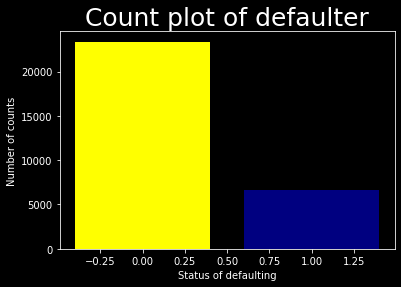

In [27]:
plt.bar(target_count['index'],target_count.default,color=['yellow','navy']);
plt.title('Count plot of defaulter',{'fontsize':25});
plt.xlabel('Status of defaulting');
plt.ylabel('Number of counts');

In [28]:
def onehot_encode(df, column_dict):
    df = df.copy()
    for column, prefix in column_dict.items():
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [29]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Drop ID
    df = df.drop('ID', axis=1)
    
    df = onehot_encode(
        df,
        {
            'EDUCATION': 'EDU',
            'MARRIAGE': 'MAR'
        }
    )
    
    # Split df into X and y
    y = df['default'].copy()
    X = df.drop('default', axis=1).copy()
    
    # Scale X with a standard scaler
    scaler = StandardScaler()
    X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    
    return X, y

In [30]:
X, y = preprocess_inputs(data)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)

In [55]:
algorithms = {
    'Model Name':[],
    'Accuracy' :[]
}

In [56]:
models = {
    LogisticRegression()     : "Logistic Regression",
    SVC()                    : "Support Vector Machine",
    DecisionTreeClassifier() : "Decision Tree Classification"
  
}

for model in models.keys():
    model.fit(X_train, y_train)

In [57]:
for model, name in models.items():
    algorithms['Model Name'].append(name)
    algorithms['Accuracy'].append(model.score(X_test,y_test))

In [58]:
algorithms

{'Model Name': ['Logistic Regression',
  'Support Vector Machine',
  'Decision Tree Classification'],
 'Accuracy': [0.8143333333333334, 0.8203333333333334, 0.7275555555555555]}

In [59]:
pd.DataFrame(algorithms)

,Model Name,Accuracy
0,Logistic Regression,0.814333
1,Support Vector Machine,0.820333
2,Decision Tree Classification,0.727556
